# Unsupervised Learning in Python
- William Surles
- 2017-12-19
- DataCamp class
- https://www.datacamp.com/courses/unsupervised-learning-in-python

## Whats Covered

** Custering for dataset exploration **
- Unsupervised learning
- Evaluating a clustering
- Transforming features for better clusterings

** Visualization with hierarchical clustering and t-SNE **
- Visualizing hierarchies
- Cluster labels in hierarchical clustering
- t-SNE for 2-dimensional maps

** Decorrelating your data and dimension reduction **
- Visualizing the PCA transformation
- Intrinsic dimension
- Dimension reduction with PCA

**Discovering interpretable features**
- Non-negative matrix factorization (NMF)
- NMF learns interpretable parts
- Building recommender systems using NMF
- Final thoughts


## Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%run data/data.py

# Clustering for dataset exploration

## Unsupervised learning

#### Unsupervised learning 
- Unspervised learning finds patterns in data
- E.G. clustering customers by their purchases
- Compressing the data using purchase patterns (dimension reduction)

#### Supervised vs unsupervised learning
- Supervised learning finds paterns for a prediction task
- e.g. classify tumors as benign or cancerous (training on labels)
- Unsupervised learning finds paters in data... but without a specific prediction task in mind

#### Iris dataset
- measurements of many iris plants
- 3 species of iris: setosa, versicolor, virgininca
- Petal length, petal width, sepal length, wepal width (the features of the dataset)

#### Arrays, features & samples
- 2D NumPy array
- Columns are measurements (the features)
- Rows represent iris plants (the samples)

#### Iris data is 4-dimensional
- Iris samples are points in 4 dimensional space
- Dimension = number of features
- Dimension too high to visualize... but unsupervised learning gives insight

#### k-means clustering
- Finds cluster of samples
- Number of clusters must be specified
- Implemented in `sklearn`

#### Cluster labels for new samples
- new samples can be assigned to existing clusters
- k-means remembers the mean of each cluster (the "centroids")
- Finds the nearest centroid to each new sample


### How many clusters?
- 3

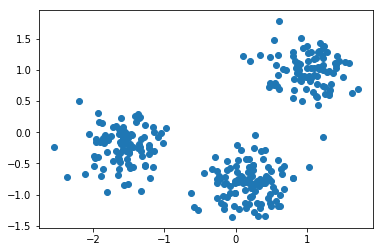

In [2]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show()

### Clustering 2D points

In [3]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[0 2 1 0 2 0 2 2 2 1 0 2 2 1 1 2 1 1 2 2 1 2 0 2 0 1 2 1 1 0 0 2 2 2 1 0 2
 2 0 2 1 0 0 1 0 2 1 1 2 2 2 2 1 1 0 0 1 1 1 0 0 2 2 2 0 2 1 2 0 1 0 0 0 2
 0 1 1 0 2 1 0 1 0 2 1 2 1 0 2 2 2 0 2 2 0 1 1 1 1 0 2 0 1 1 0 0 2 0 1 1 0
 1 1 1 2 2 2 2 1 1 2 0 2 1 2 0 1 2 1 1 2 1 2 1 0 2 0 0 2 1 0 2 0 0 1 2 2 0
 1 0 1 2 0 1 1 0 1 2 2 1 2 1 1 2 2 0 2 2 1 0 1 0 0 2 0 2 2 0 0 1 0 0 0 1 2
 2 0 1 0 1 1 2 2 2 0 2 2 2 1 1 0 2 0 0 0 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 1
 2 2 0 1 0 0 1 0 1 0 1 2 2 1 2 2 2 1 0 0 1 2 2 1 2 1 1 2 1 1 0 1 0 0 0 2 1
 1 1 0 2 0 1 0 1 1 2 0 0 0 1 2 2 2 0 2 1 1 2 0 0 1 0 0 1 0 2 0 1 1 1 1 2 1
 1 2 2 0]


### Inspect your clustering

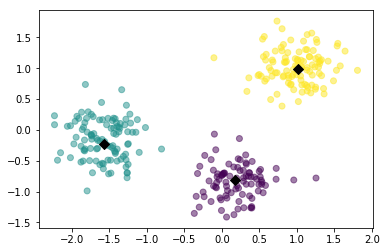

In [4]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha = 0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker = 'D', s=50, c = 'k')
plt.show()

## Evaluating a clustering

#### Evaluating a clustering
- Can check correspondence with e.g. iris species ... but what if there are no species to check against?
- We measure quality of a clustering with inertia. This informs choice of how many clusters to look for.

#### Iris: cluster vs species
- k-means found 3 clusters amongst the iris samples
- Do the clusters correspond to the species?

#### Cross tabulation with pandas
- Clusters vs species is a "Cross-tabulation"
- Use the pandas library
- Given the species of each sample as a list species

How to evalute a clustering if there were no species information? ...

#### Measuring  clustering quality
- Using only samples and their cluster labels
- A good clusterin has tight clusters ... and samples in each cluster bunched together

#### Inertia measures clustering quality
- Measures how spread out the clusters are (lower is better)
- Distance from each sample to centroid of its cluster
- After `fit()`, available as attribute `inertia_`
- k_means atempts to minimize the inertia when choosing clusters

#### How many clusters to choose
- A good clustering has tight clusters (so low inertia) ... but not too many clusters.
- The inertia will keep decreasing as we add more clusters but at some point the decrease will be minimal
- Choose an "elbow" in the inertia plot, where inertia begins to decrease more slowly

### How many clusters of grain?

In [5]:
from urllib.request import urlretrieve

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
urlretrieve(url, 'data/uci_rice')
rice_features = np.loadtxt('data/uci_rice')
print(rice_features.shape)

(210, 8)


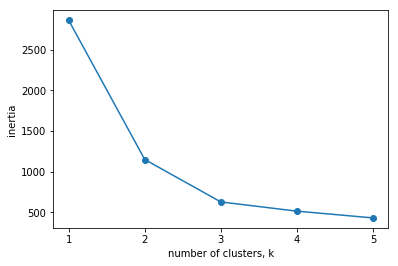

In [6]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(rice_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Evaluating the grain clustering

In [7]:
rice_names = np.concatenate([np.repeat(name, 70) for name in ['Kama', 'Rosa', 'Canadian']])
rice_names

array(['Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
      

In [8]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(rice_features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': rice_names})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian  Kama  Rosa
labels                         
0                 0    64    10
1                70     5     0
2                 0     1    60


## Transforming features for better clusterings

#### Pidemont wines dataset
- 178 sample from 3 distinct varieties of red wine: Barolo, Grignolino, and Barbera
- Features measure chemical composition e.g. alcohol content
- also visual proerties like " color intensity"

#### Clustering the wines

In [9]:
file = 'https://assets.datacamp.com/production/course_2072/datasets/wine.csv'
wines = pd.read_csv(file)
wines.head()

class_label class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0            1     Barolo    14.23        1.71  2.43               15.6   
1            1     Barolo    13.20        1.78  2.14               11.2   
2            1     Barolo    13.16        2.36  2.67               18.6   
3            1     Barolo    14.37        1.95  2.50               16.8   
4            1     Barolo    13.24        2.59  2.87               21.0   

   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0        127           2.80        3.06                  0.28   
1        100           2.65        2.76                  0.26   
2        101           2.80        3.24                  0.30   
3        113           3.85        3.49                  0.24   
4        118           2.80        2.69                  0.39   

   proanthocyanins  color_intensity   hue  od280  proline  
0             2.29             5.64  1.04   3.92     1065  
1             1.28             4.38  1.05   3.40     1050  
2             2.81             5.68  1.03   3.17     1185  
3             2.18             7.80  0.86   3.45     1480  
4             1.82             4.32  1.04   2.93      735

In [10]:
wine_features = wines.drop(['class_label', 'class_name'], axis = 1)
wine_names = wines.class_name

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
labels = model.fit_predict(wine_features)

In [12]:
df = pd.DataFrame({'labels':labels, 'names':wine_names})
ct = pd.crosstab(df['labels'], df['names'])
ct

names   Barbera  Barolo  Grignolino
labels                             
0             0      46           1
1            19       0          50
2            29      13          20

#### Feature variances
- The wine features have very differnet variances
- Variance of a feture measures spread of its values
- especially `proline` which has a std of 314

In [13]:
wine_features.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue       od280      proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

#### StandardScaler
- In kmeans: feature variance = feature influence
- `StandardScaler` transforms each feature to have mean o and variance 1
- Features are said to be "standardized"

#### sklearn StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(wine_features)

wine_scaled = scaler.transform(wine_features)

wine_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ..., 
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### Similar methods
- StandardScaler and KMeans have similar methods
- Use `fit()` / `transform()` with `StandardScaler`
- Use `fit()` / `predict()` with `KMeans`

#### StandardScaler, then KMeans
- Need to perform tow steps: StandardScaler, then KMeans
- Use sklearn pipeline to combine multiple steps
- Data flows from one step into the next

#### Pipelines combine multiple steps

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)

pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(wine_features)

labels = pipeline.predict(wine_features)

labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### Feature standardization improves clustering
- Wow, this is almost perfect now. 

In [16]:
df = pd.DataFrame({'labels':labels, 'names':wine_names})
ct = pd.crosstab(df['labels'], df['names'])
ct

names   Barbera  Barolo  Grignolino
labels                             
0             0      59           3
1            48       0           3
2             0       0          65

#### sklearn preprocessing steps
- StandardScaler is a "preprocessing" step
- MaxAbsScaler and Normalizer are other examples

### Scaling fish data for clustering

In [17]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


### Clustering the fish data

In [18]:
file = 'https://assets.datacamp.com/production/course_2072/datasets/fish.csv'
fish = pd.read_csv(file, header = None)
fish.head()

0      1     2     3     4     5     6
0  Bream  242.0  23.2  25.4  30.0  38.4  13.4
1  Bream  290.0  24.0  26.3  31.2  40.0  13.8
2  Bream  340.0  23.9  26.5  31.1  39.8  15.1
3  Bream  363.0  26.3  29.0  33.5  38.0  13.3
4  Bream  430.0  26.5  29.0  34.0  36.6  15.1

In [19]:
fish_features = fish.drop([0], axis = 1)
fish_features.head()

1     2     3     4     5     6
0  242.0  23.2  25.4  30.0  38.4  13.4
1  290.0  24.0  26.3  31.2  40.0  13.8
2  340.0  23.9  26.5  31.1  39.8  15.1
3  363.0  26.3  29.0  33.5  38.0  13.3
4  430.0  26.5  29.0  34.0  36.6  15.1

In [20]:
fish_names = fish[0]
fish_names[0:6]

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
5    Bream
Name: 0, dtype: object

In [21]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(fish_features)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish_features)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels,'species': fish_names})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1           33     0      1      0
2            0     0      0     13
3            1     0     19      1


- But what would it have been without the scaling? 
- i.e. what if I de-scale the fish? heh : )

In [22]:
## pipeline with no scaler
pipeline = make_pipeline(kmeans)

pipeline.fit(fish_features)

labels = pipeline.predict(fish_features)

df = pd.DataFrame({'labels': labels,'species': fish_names})

ct = pd.crosstab(df['labels'], df['species'])

print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     4      0      0
1           17    10      3      0
2            1     1     17     14
3           16     2      0      0


- Well, thats not nearly as good. Scaling is legit

### Clustering stocks using KMeans

In [23]:
file = 'https://assets.datacamp.com/production/course_2072/datasets/company-stock-movements-2010-2015-incl.csv'
movements = pd.read_csv(file)
movements.head()

Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  2010-01-07  \
0             Apple    0.580000   -0.220005   -3.409998   -1.170000   
1               AIG   -0.640002   -0.650000   -0.210001   -0.420000   
2            Amazon   -2.350006    1.260009   -2.350006   -2.009995   
3  American express    0.109997    0.000000    0.260002    0.720002   
4            Boeing    0.459999    1.770000    1.549999    2.690003   

   2010-01-08  2010-01-11  2010-01-12  2010-01-13  2010-01-14     ...      \
0    1.680011   -2.689994   -1.469994    2.779997   -0.680003     ...       
1    0.710001   -0.200001   -1.130001    0.069999   -0.119999     ...       
2    2.960006   -2.309997   -1.640007    1.209999   -1.790001     ...       
3    0.190003   -0.270001    0.750000    0.300004    0.639999     ...       
4    0.059997   -1.080002    0.360000    0.549999    0.530002     ...       

   2013-10-16  2013-10-17  2013-10-18  2013-10-21  2013-10-22  2013-10-23  \
0    0.320008    4.519997    2.899987    9.590019   -6.540016    5.959976   
1    0.919998    0.709999    0.119999   -0.480000    0.010002   -0.279998   
2    2.109985    3.699982    9.570008   -3.450013    4.820008   -4.079986   
3    0.680001    2.290001    0.409996   -0.069999    0.100006    0.069999   
4    1.559997    2.480003    0.019997   -1.220001    0.480003    3.020004   

   2013-10-24  2013-10-25  2013-10-28  2013-10-29  
0    6.910011   -5.359962    0.840019  -19.589981  
1   -0.190003   -0.040001   -0.400002    0.660000  
2    2.579986    4.790009   -1.760009    3.740021  
3    0.130005    1.849999    0.040001    0.540001  
4   -0.029999    1.940002    1.130005    0.309998  

[5 rows x 964 columns]

In [24]:
movements_features = movements.drop(['Unnamed: 0'], axis = 1)
movements_names = movements['Unnamed: 0']

In [25]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements_features)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

### Which stocks move together?

In [26]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements_features)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': movements_names})

# Display df sorted by cluster label
print(df.sort_values('labels'))

                             companies  labels
41                       Philip Morris       0
28                           Coca Cola       1
27                      Kimberly-Clark       1
56                            Wal-Mart       1
39                              Pfizer       1
25                   Johnson & Johnson       1
38                               Pepsi       1
40                      Procter Gamble       1
9                    Colgate-Palmolive       1
54                            Walgreen       1
35                            Navistar       2
53                       Valero Energy       2
44                        Schlumberger       2
8                          Caterpillar       2
6             British American Tobacco       3
57                               Exxon       3
43                                 SAP       3
42                   Royal Dutch Shell       3
49                               Total       3
12                             Chevron       3
37           

# Visualization with hierarchical clustering and t-SNE

## Visualizing hierarchies

#### Visualisations communicate insight
- "t-SNE": Creates a 2D map of a dataset (later)
- "Hierarchical clustering" (this video)

#### A hierarchy of groups
- Groups of living things can form a hierarchy
- Clusters are contained in one another

#### Hierarchical clustering
- Every country begins in a separate cluster
- At each step, the two closest clusters are merged
- Continue until all countries in a single cluster
- This is "agglomerativer" hierarchical clusting
 - There are other ways to do it

### How many merges?

- There is always one less merge than there are samples

### Hierarchical clustering of the grain data

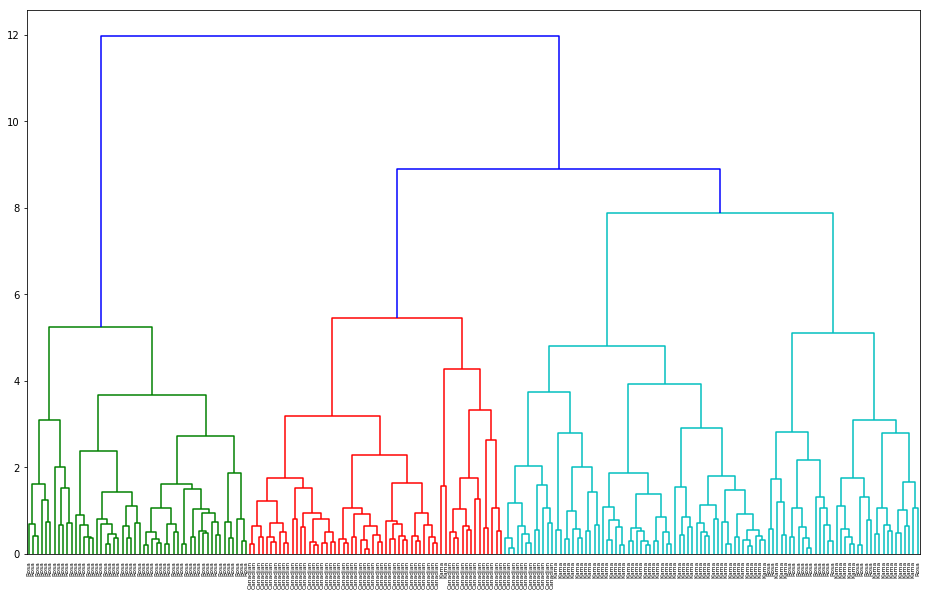

In [27]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(rice_features, method = 'complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(16,10))
dendrogram(
    mergings,
    labels=rice_names.tolist(),
    leaf_rotation=90,
    leaf_font_size=6)
plt.show()


### Hierarchies of stocks

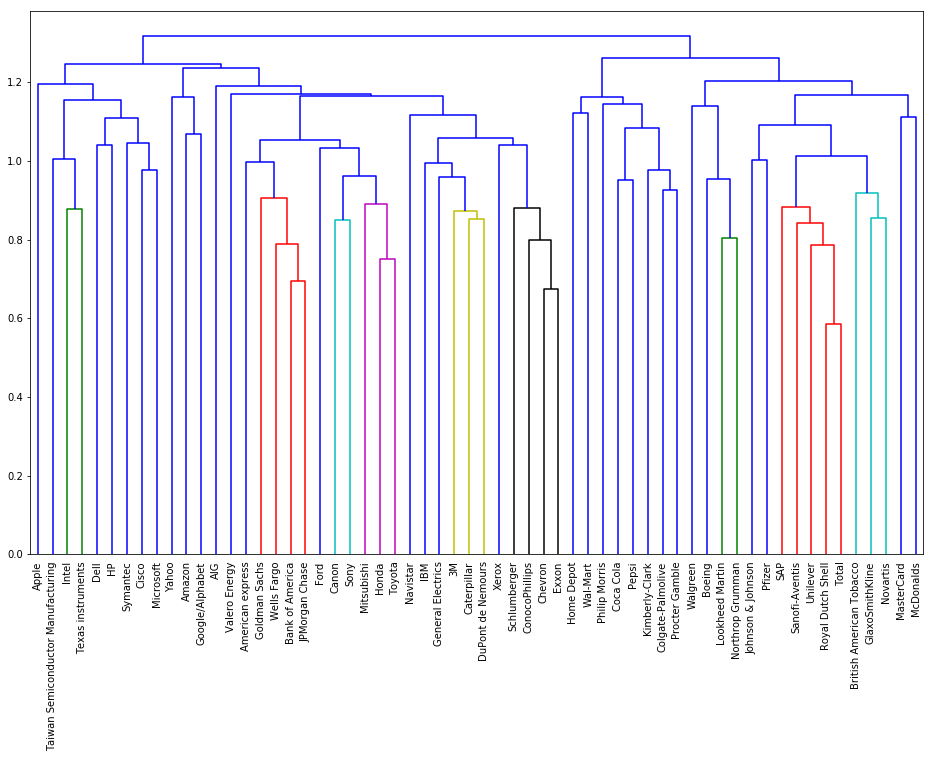

In [28]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements_features)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

# Plot the dendrogram
plt.figure(figsize=(16,10))
dendrogram(
    mergings,
    labels = movements_names.tolist(),
    leaf_rotation = 90,
    leaf_font_size = 10)
plt.show()

## Cluster labels in hierarchical clustering

- Not only a visial tool
- Cluster labels at any intermediate stage can be recovered
- Fro use in e.g. cross-tabulations

#### Dendrograms show cluster distances
- height on dendrogram = distance between merging clusters
- E.G. clusters with only Cyprus and Greece had distance approx. 6
- The new cluster distance approx. 12 from cluster with only Bulgaria

#### Intermediate clustersing & height on dendrogram
- Height on dendrogram specifies max. distance between merging clusters
- Don't merge clusters further apart than this (e.g. 15)

#### Distance between clusters
- Defined by a "linkage method"
- Specified via method parameter, e.g. `linkage(samples, method = "complete")`
- In "complete" linkage: distance between clsuter is max. distance between their samples
- Different linkage method, different hierarchical clustering!

#### Extracting cluster labels
- Use the `fcluster` method
- Returns a NumPy array of cluster labels

### Which clusters are closest?

- In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. 
- In single linkage, the distance between clusters is the distance between the closest points of the clusters.

### Different linkage, different hierarchical clustering!

In [29]:
file = 'https://assets.datacamp.com/production/course_2072/datasets/eurovision-2016.csv'
eurovision = pd.read_csv(file)
eurovision.head()

From country       To country  Jury A  Jury B  Jury C  Jury D  Jury E  \
0      Albania          Belgium      20      16      24      22      24   
1      Albania   Czech Republic      21      15      25      23      16   
2      Albania  The Netherlands      22      14      23      24      21   
3      Albania       Azerbaijan      19      12      11      21      11   
4      Albania          Hungary       8      13       9      14       9   

   Jury Rank  Televote Rank  Jury Points  Televote Points  
0         25             14          NaN              NaN  
1         22             22          NaN              NaN  
2         24             24          NaN              NaN  
3         13             19          NaN              NaN  
4         10             10          1.0              1.0

In [30]:
eurovision['To country'].nunique()

26

In [31]:
eurovision['From country'].nunique()

42

In [32]:
eurovision.describe()

Jury A       Jury B       Jury C       Jury D       Jury E  \
count  1066.000000  1066.000000  1066.000000  1066.000000  1066.000000   
mean     13.195122    13.195122    13.195122    13.195122    13.195122   
std       7.332698     7.332698     7.332698     7.332698     7.332698   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       7.000000     7.000000     7.000000     7.000000     7.000000   
50%      13.000000    13.000000    13.000000    13.000000    13.000000   
75%      20.000000    20.000000    20.000000    20.000000    20.000000   
max      26.000000    26.000000    26.000000    26.000000    26.000000   

         Jury Rank  Televote Rank  Jury Points  Televote Points  
count  1066.000000    1066.000000   420.000000       420.000000  
mean     13.195122      13.195122     5.800000         5.800000  
std       7.332698       7.332698     3.344643         3.344643  
min       1.000000       1.000000     1.000000         1.000000  
25%       7.000000       7.000000     3.000000         3.000000  
50%      13.000000      13.000000     5.500000         5.500000  
75%      20.000000      20.000000     8.000000         8.000000  
max      26.000000      26.000000    12.000000        12.000000

In [33]:
euro_pivot = eurovision.pivot(index = 'From country', columns = 'To country', values = 'Jury Rank')
print(euro_pivot.shape)
euro_pivot.head()

(42, 26)


To country    Armenia  Australia  Austria  Azerbaijan  Belgium  Bulgaria  \
From country                                                               
Albania          15.0        1.0     16.0        13.0     25.0       7.0   
Armenia           NaN        6.0     22.0        25.0      7.0       4.0   
Australia        13.0        NaN     24.0        12.0      1.0       3.0   
Austria           9.0        1.0      NaN        12.0      6.0      14.0   
Azerbaijan       25.0        4.0     15.0         NaN     22.0       3.0   

To country    Croatia  Cyprus  Czech Republic  France       ...        \
From country                                                ...         
Albania          21.0    23.0            22.0     2.0       ...         
Armenia          15.0     5.0            10.0     1.0       ...         
Australia        10.0    20.0            16.0     5.0       ...         
Austria           5.0    24.0             7.0     4.0       ...         
Azerbaijan       11.0    19.0            16.0    12.0       ...         

To country    Lithuania  Malta  Poland  Russia  Serbia  Spain  Sweden  \
From country                                                            
Albania            20.0    9.0    14.0     4.0    19.0    5.0    11.0   
Armenia            14.0    3.0    23.0     9.0    12.0    8.0    17.0   
Australia           4.0   21.0    22.0    18.0    11.0    6.0    23.0   
Austria            10.0    2.0    25.0     8.0    22.0   15.0     3.0   
Azerbaijan          6.0    5.0     9.0     1.0    18.0   10.0    20.0   

To country    The Netherlands  Ukraine  United Kingdom  
From country                                            
Albania                  24.0     12.0             6.0  
Armenia                  11.0     16.0            19.0  
Australia                 8.0      9.0             7.0  
Austria                  11.0     16.0            18.0  
Azerbaijan               13.0      2.0            14.0  

[5 rows x 26 columns]

In [34]:
eurovision_features = euro_pivot.fillna(0)
eurovision_features.head()

To country    Armenia  Australia  Austria  Azerbaijan  Belgium  Bulgaria  \
From country                                                               
Albania          15.0        1.0     16.0        13.0     25.0       7.0   
Armenia           0.0        6.0     22.0        25.0      7.0       4.0   
Australia        13.0        0.0     24.0        12.0      1.0       3.0   
Austria           9.0        1.0      0.0        12.0      6.0      14.0   
Azerbaijan       25.0        4.0     15.0         0.0     22.0       3.0   

To country    Croatia  Cyprus  Czech Republic  France       ...        \
From country                                                ...         
Albania          21.0    23.0            22.0     2.0       ...         
Armenia          15.0     5.0            10.0     1.0       ...         
Australia        10.0    20.0            16.0     5.0       ...         
Austria           5.0    24.0             7.0     4.0       ...         
Azerbaijan       11.0    19.0            16.0    12.0       ...         

To country    Lithuania  Malta  Poland  Russia  Serbia  Spain  Sweden  \
From country                                                            
Albania            20.0    9.0    14.0     4.0    19.0    5.0    11.0   
Armenia            14.0    3.0    23.0     9.0    12.0    8.0    17.0   
Australia           4.0   21.0    22.0    18.0    11.0    6.0    23.0   
Austria            10.0    2.0    25.0     8.0    22.0   15.0     3.0   
Azerbaijan          6.0    5.0     9.0     1.0    18.0   10.0    20.0   

To country    The Netherlands  Ukraine  United Kingdom  
From country                                            
Albania                  24.0     12.0             6.0  
Armenia                  11.0     16.0            19.0  
Australia                 8.0      9.0             7.0  
Austria                  11.0     16.0            18.0  
Azerbaijan               13.0      2.0            14.0  

[5 rows x 26 columns]

In [35]:
eurovision_names = euro_pivot.index.tolist()
eurovision_names[:6]

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus']

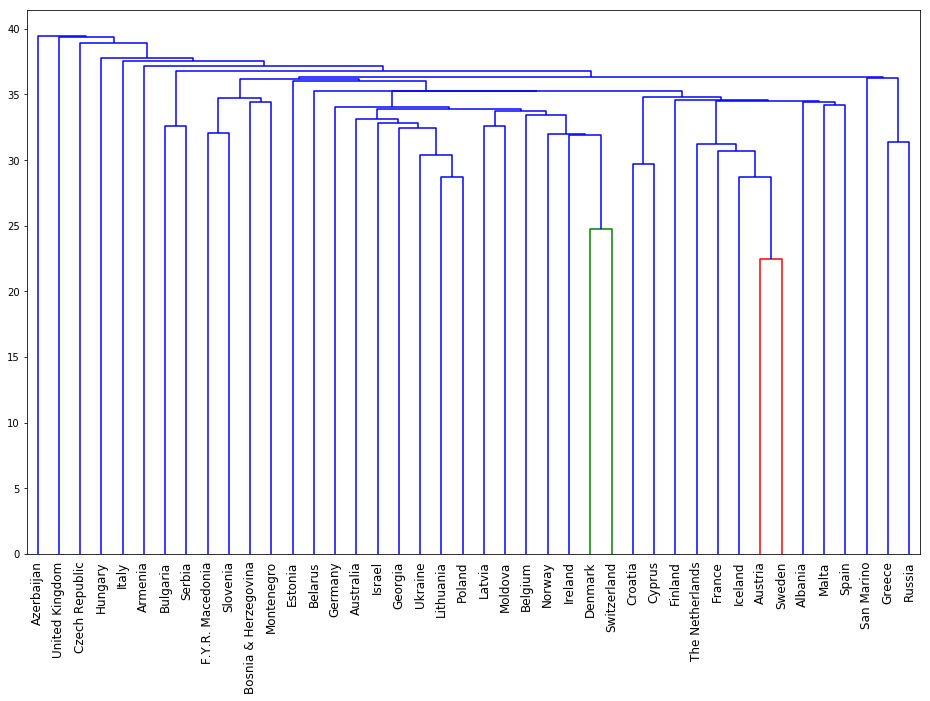

In [36]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(eurovision_features, method = "single")

# Plot the dendrogram
plt.figure(figsize=(16,10))
dendrogram(
    mergings,
    labels = eurovision_names,
    leaf_rotation = 90,
    leaf_font_size = 12)
plt.show()


This is what it would look like with `complete` linkage...

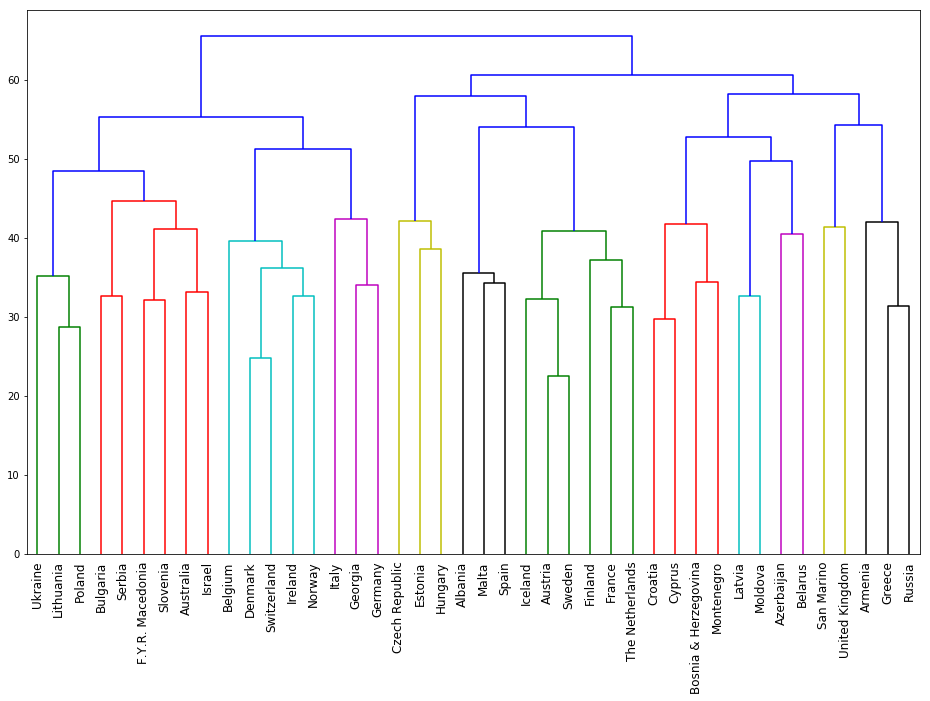

In [37]:
# Calculate the linkage: mergings
mergings = linkage(eurovision_features, method = "complete")

# Plot the dendrogram
plt.figure(figsize=(16,10))
dendrogram(
    mergings,
    labels = eurovision_names,
    leaf_rotation = 90,
    leaf_font_size = 12)
plt.show()


### Extracting the cluster labels

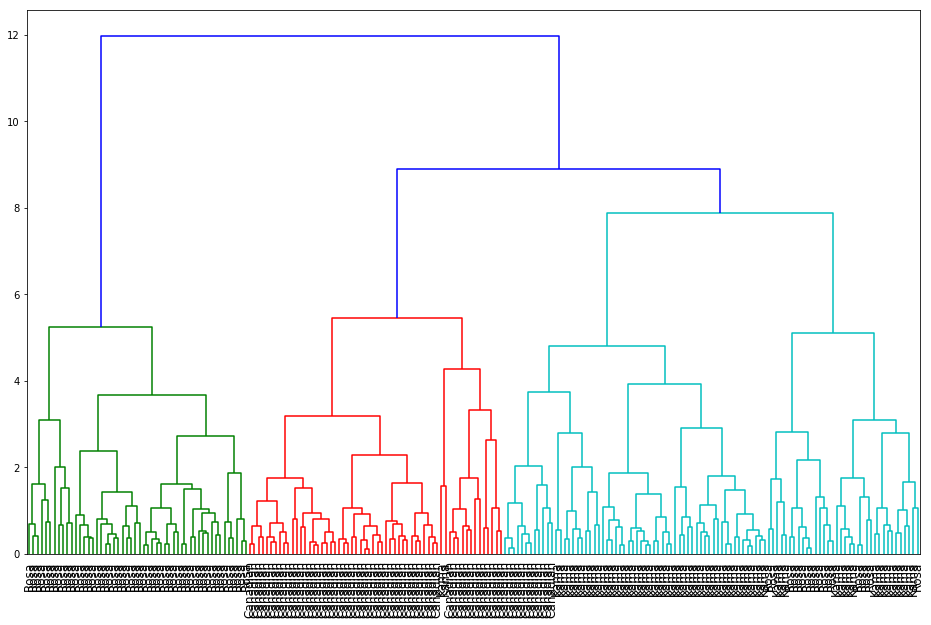

In [38]:
# Calculate the linkage: mergings
mergings = linkage(rice_features, method = "complete")

# Plot the dendrogram
plt.figure(figsize=(16,10))
dendrogram(
    mergings,
    labels = rice_names,
    leaf_rotation = 90,
    leaf_font_size = 12)
plt.show()


In [39]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(
    mergings, 
    8,
    criterion = 'distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': rice_names})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties  Canadian  Kama  Rosa
labels                         
1                 0     0    52
2                58     2     0
3                12    68    18


## t-SNE for 2-dimensional maps

- t-SNE = "t-distributed stochastic neighbor embedding"
- Maps samples to 2D space (or 3D)
- map approximately preserves nearness of samples
- Great for inspecitg datasets

#### t-SNE has only fit_transform()
- has a `fit_tranform()` method
- simultaneously fits the model and transforms the data
- Has no separate `fit()` or `transoform()` methods
- Can't extend the map to include new data samples
- Must start over each time!

#### t-SNE learnign rate
- Choose learning rate for the dataset
- Wrong choice: points bunch together
- Try values between 50 and 200

#### Different every time
- t-SNE features are different every time
- points will be separated in a similar way but the axis are differnet

### t-SNE visualization of grain dataset

In [40]:
classnames, indices = np.unique(rice_names, return_inverse=True)

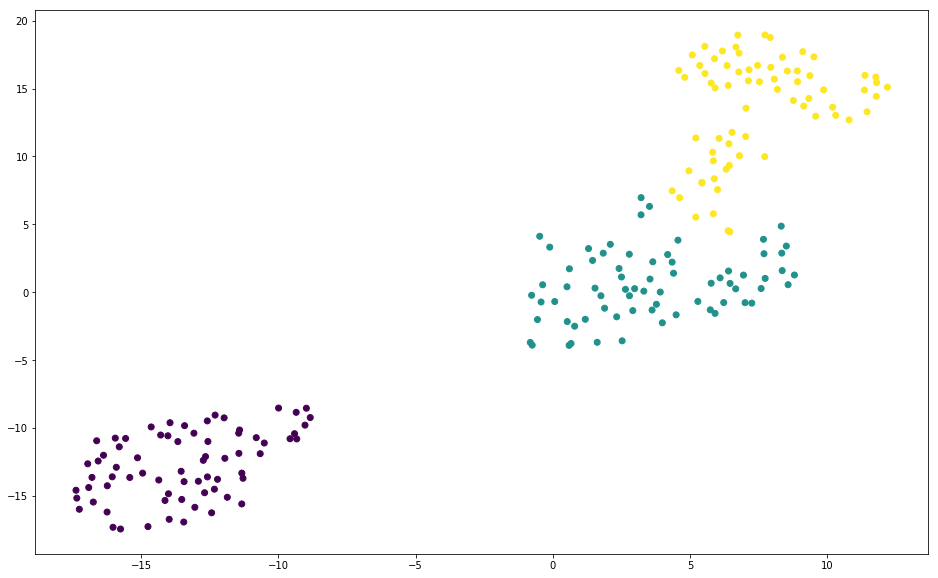

In [41]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(rice_features)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(16,10))
plt.scatter(xs, ys, c = indices)
plt.show()


### A t-SNE map of the stock market

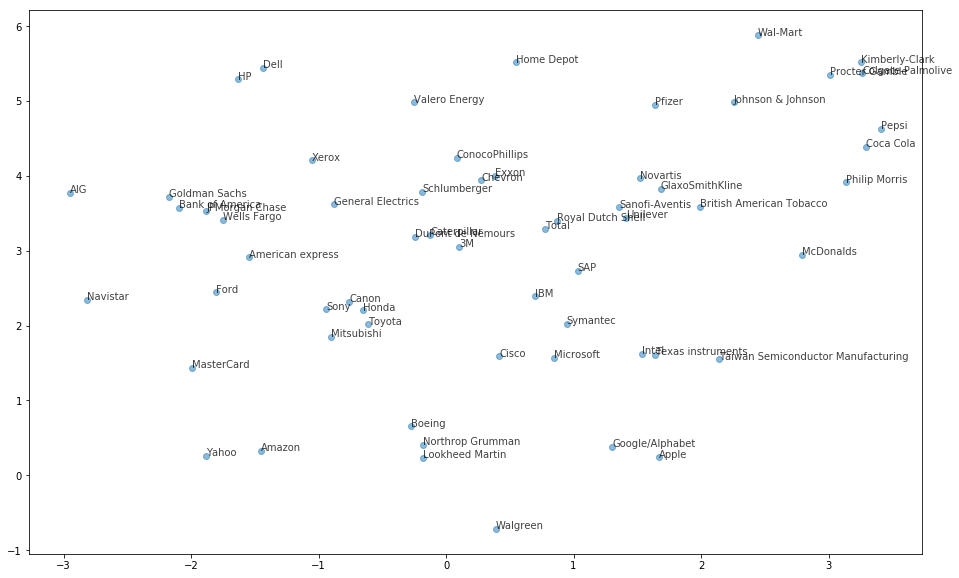

In [42]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(16,10))
plt.scatter(xs, ys, alpha = .5)

# Annotate the points
for x, y, company in zip(xs, ys, movements_names):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()


# Decorrelating your data and dimension reduction

## Visualizing the PCA transformation

#### Dimension Reduction
- More efficient storage and computation
- Remove less-informative "noise" features
- ... which cause problems for prediction tasks, e.g. classification, regression
- The instructor says that most prediction problems in the real world are made possible by dimension reduction

#### Principal Component Analysis
- PCA = "Principal Component Analysis"
- Fundamental dimension reduciton technique
- Most common method of dimension reduction
- First step "decorrelation" (considered here)
- Second step reduces dimension (considered later)

#### PCA aligns data with axes
- Rotates data samples to be aligned with axes
- Shifts data samples so they have mean 0
- No information is lost

#### PCA follows the fit/transform pattern
- PCA is a scikit-learn component like KMeans or StandardScaler
- `fit()` learns the transformation from given data
- `transform()` applies the learned transformation
- `transform()` can also be applied to new data

#### PCA features
- Rows of transformed correspond to samples
- Columns of transformed are the "PCA features"
- Row gives PCA feature values of corresponding sample

#### PCA features are not correlated
- Features of dataset are often correlated, e.g. total_phenols and od280 (from wine data)
- PCA aligns the data with axes
- Resulting PCA features are not linearly correlated ("decorrelation")

#### Pearson correlation
- Measures linear correlation of features
- Value between -1 and 1
- Value of 0 means no linear correlation

#### Principal components
- "Principal components" = directions of variance
- PCA aligns principal components with the axes
- Available as `components_` attribute of PCA object
- Each row defines displacement from mean

### Correlated data in nature

In [43]:
grains = pd.read_csv('data/seeds-width-vs-length.csv', header = None)
grains.head()

0      1
0  3.312  5.763
1  3.333  5.554
2  3.337  5.291
3  3.379  5.324
4  3.562  5.658

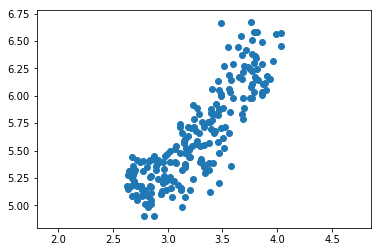

0.860414937714


In [44]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains.loc[:,0]

# Assign the 1st column of grains: length
length = grains.loc[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


### Decorrelating the grain measurements with PCA

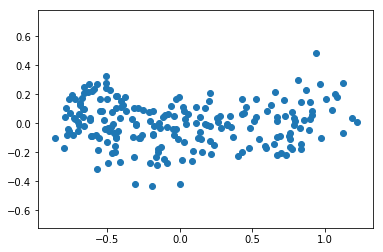

1.74408660987e-16


In [45]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Intrinsic dimension

#### Intrinsic dimension of a flight path
- 2 features: longitude and latitude at points along a flight path
- Dataset appears to be 2-dimensional
- But can approximate using one feature: displacement along flight path
- Is intrinsically 1-dimensional

#### Intrinsic dimension
- Intrinsic dimension = number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA

#### PCA identifies intrinsic dimension
- Scatter plots work only if samples have 2 or 3 features
- PCA identifies intrinsic dimension when samples have any number of features
- Intrinsic dimension = number of PCA features with significant variance

#### Variance and intrinsic dimension
- Intrinsic dimension is the number of PCA features with significant variance
- In the versicolor iris example, only the first 2 features 
- You can plot the features and see which seem significant

#### Intrinsic dimension can be ambiguous
- Intrinsic dimension is an idealization
- ... there is not always one correct answer
- 

### The first principal component

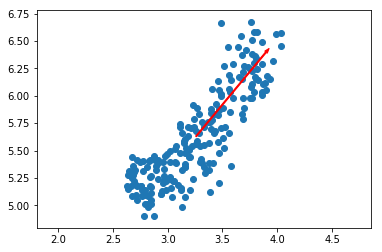

In [46]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.loc[:,0], grains.loc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Variance of the PCA features

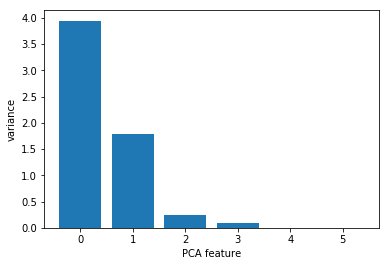

In [47]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(fish_features)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Intrinsic dimension of the fish data

- 2

## Dimension reduction with PCA

#### Dimension Reduction
- Represents same data, using less features
- Important part of machine-learning pipelines
- Can be performed using PCA

#### Dimension Reduction with PCA
- PCA features are in decreasing order of variance
- Assumes the low variance features are "noise"
- ... and high variance features are informative
- Specify how many features to keep
- e.g. PCA(n_components=2)
- Keeps the first 2 PCA features
- Intrinsic dimension is a good choice
- Discards low variance PCA features

#### Word frequency arrays
- Rows represent documents, columns represent words
- Entries measure presence of each word in each document
- ... measure using "tf-idf" (more later)

#### Sparse arrays and csr_matrix
- Array is "sparse": most entries are zero
- Can use `scipy.sparse.csr_matrix` insted of NumPy array
- `csr_matrix` remembers only the non-zero entries (saves space!)

#### Truncated SVD and csr_matrix
- scikit-learn PCA doesn't support csr_matrix
- Use scikit-learn Truncated SVD instead
- Performs same transformation

### Dimension reduction of the fish measurements

In [48]:
# Import PCA
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

fish_scaled = scale(fish_features)

# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(fish_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(fish_scaled)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


### A tf-idf word-frequency array

In [49]:
example_documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [50]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(example_documents)

# Print result of toarray() method
print(csr_mat.toarray())

[[ 0.51785612  0.          0.          0.68091856  0.51785612  0.        ]
 [ 0.          0.          0.51785612  0.          0.51785612  0.68091856]
 [ 0.51785612  0.68091856  0.51785612  0.          0.          0.        ]]


In [51]:
# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [54]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(example_documents)

# Print result of toarray() method
print(csr_mat.toarray())

[[ 0.51785612  0.          0.          0.68091856  0.51785612  0.        ]
 [ 0.          0.          0.51785612  0.          0.51785612  0.68091856]
 [ 0.51785612  0.68091856  0.51785612  0.          0.          0.        ]]


### Clustering Wikipedia part I

In [55]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('data/wikipedia-vectors.csv', index_col=0)
df.head()

HTTP 404  Alexa Internet  Internet Explorer  HTTP cookie  Google Search  \
0       0.0        0.000000                0.0          0.0            0.0   
1       0.0        0.000000                0.0          0.0            0.0   
2       0.0        0.029607                0.0          0.0            0.0   
3       0.0        0.000000                0.0          0.0            0.0   
4       0.0        0.000000                0.0          0.0            0.0   

   Tumblr  Hypertext Transfer Protocol  Social search  Firefox  LinkedIn  \
0     0.0                          0.0            0.0      0.0       0.0   
1     0.0                          0.0            0.0      0.0       0.0   
2     0.0                          0.0            0.0      0.0       0.0   
3     0.0                          0.0            0.0      0.0       0.0   
4     0.0                          0.0            0.0      0.0       0.0   

      ...       Chad Kroeger  Nate Ruess  The Wanted  Stevie Nicks  \
0     ...                0.0         0.0         0.0      0.008878   
1     ...                0.0         0.0         0.0      0.000000   
2     ...                0.0         0.0         0.0      0.000000   
3     ...                0.0         0.0         0.0      0.000000   
4     ...                0.0         0.0         0.0      0.000000   

   Arctic Monkeys  Black Sabbath  Skrillex  Red Hot Chili Peppers   Sepsis  \
0             0.0            0.0  0.049502               0.000000  0.00000   
1             0.0            0.0  0.000000               0.000000  0.00611   
2             0.0            0.0  0.000000               0.000000  0.00000   
3             0.0            0.0  0.000000               0.005646  0.00000   
4             0.0            0.0  0.000000               0.000000  0.00000   

   Adam Levine  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 60 columns]

In [56]:
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [57]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


### Clustering Wikipedia part II

In [58]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


                                          article  label
19  2007 United Nations Climate Change Conference      0
17  Greenhouse gas emissions by the United States      0
16                                        350.org      0
15                                 Kyoto Protocol      0
14                                 Climate change      0
13                               Connie Hedegaard      0
12                                   Nigel Lawson      0
11       Nationally Appropriate Mitigation Action      0
10                                 Global warming      0
18  2010 United Nations Climate Change Conference      0
59                                    Adam Levine      1
51                                     Nate Ruess      1
52                                     The Wanted      1
53                                   Stevie Nicks      1
54                                 Arctic Monkeys      1
55                                  Black Sabbath      1
56                             

- Wow, that so simple of a pipeline, and it does such a good job of clustering
- These groups totally makes sense. I love this.

# Discovering interpretable features

## Non-negative matrix factorization (NMF)

#### Non-negative matrix factorization
- NMF = "non-negative matrix factorization"
- Dimension reduction technique
- NMF models are interpretable (unlike PCA)
- Easy to interpret means easy to explain!
- However, all samples features must be non-negative (>= 0)

#### Interpretable parts
- NMF expresses documents as combinations of topics (or "themes")
- NMF expresses images as combinations of patterns

#### Using scikit-learn NMF
- Follows `fit()`/`transform()` pattern
- Must specify number of components e.g. `NMF(n_components = 2)`
- Works with NumPy arrays and with `csr_matrix`

#### Example word-frequency array
- Word frequency array, 4 words, many documents
- Measure presence of words in each document using "tf-idf"
- "tf" - frequency of word in document
- "idf" - reduces influence of frequent words

#### NMF components
- NMF has components... just like pcA has principal components
- Dimension of components = dimension of samples
- Entries are non-negative

#### NMF features
- NMF feature values are non-negative
- Can be used to reconstruct the samples
- ... combine feature values with components

#### Sample reconstruction
- Multiply components by feature values, and add up
- Can also be expressed as a product of matrices
- This is the "Matrix Factorization" in "NMF"

#### NMF fits to non-negative data only
- Word frequencies in each document
- Images encoded as arrays
- Audio spectrograms
- Purchase histories on e-commerce sites
- ... and many more

### NMF applied to Wikipedia articles

In [59]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features[:6])


[[ 0.          0.          0.          0.          0.          0.44044409]
 [ 0.          0.          0.          0.          0.          0.56657755]
 [ 0.00382059  0.          0.          0.          0.          0.39862741]
 [ 0.          0.          0.          0.          0.          0.38172142]
 [ 0.          0.          0.          0.          0.          0.48549363]
 [ 0.01292916  0.01378924  0.00776339  0.03344284  0.          0.33450596]]


### NMF features of the Wikipedia articles

In [60]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index = titles)
df.head()

0    1    2    3    4         5
HTTP 404           0.000000  0.0  0.0  0.0  0.0  0.440444
Alexa Internet     0.000000  0.0  0.0  0.0  0.0  0.566578
Internet Explorer  0.003821  0.0  0.0  0.0  0.0  0.398627
HTTP cookie        0.000000  0.0  0.0  0.0  0.0  0.381721
Google Search      0.000000  0.0  0.0  0.0  0.0  0.485494

In [61]:
# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575612
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422307
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


- Notice that for both actors, the NMF feature 3 has by far the highest value. 
- This means that both articles are reconstructed using mainly the 3rd NMF component. 
- In the next video, you'll see why: NMF components represent topics (for instance, acting!).

## NMF learns interpretable parts

#### Example: NMF learns interpretable parts
- Word-frequency array `articles` (tf-idf)
- 20,000 scientific articles(rows)
- 800 words (columns)
- apply NMF with number of components
 - the components will be topics
 - You can see the top words for a topic
 
#### Example: NMF learns images
- "Grayscale" image = no colors, only shades of gray
- Measure pixel brighness
- Represent with value between 0 and 1 (0 is black)
- Convert to 2D array
- Flateen to 1D array
 - enumerate the entries by row left to right into array
- Collection of images of same size
 - for collection of images each row will be an image
 - each column will be a specific pixel
- The components will be parts of the images
![](images/digit_components.png)

### NMF learns topics of documents

In [62]:
words = pd.read_csv('data/wikipedia-vocabulary-utf8.txt', header = None)[0]
words[:6]

0          aaron
1        abandon
2      abandoned
3     abandoning
4    abandonment
5          abbas
Name: 0, dtype: object

In [63]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns = words)
components_df.head()

0     aaron   abandon  abandoned  abandoning  abandonment  abbas  abbey  \
0  0.011375  0.001210   0.000000    0.001739     0.000136    0.0    0.0   
1  0.000000  0.000010   0.005663    0.000000     0.000002    0.0    0.0   
2  0.000000  0.000008   0.000000    0.000000     0.004692    0.0    0.0   
3  0.004149  0.000000   0.003056    0.000000     0.000614    0.0    0.0   
4  0.000000  0.000568   0.004918    0.000000     0.000000    0.0    0.0   

0  abbreviated  abbreviation       abc ...    zealand  zenith  zeppelin  \
0     0.002463  2.445412e-07  0.000834 ...   0.025780     0.0  0.008324   
1     0.000566  5.002510e-04  0.000000 ...   0.008106     0.0  0.000000   
2     0.000758  1.604224e-05  0.000000 ...   0.008730     0.0  0.000000   
3     0.002437  8.144671e-05  0.003985 ...   0.012596     0.0  0.000000   
4     0.000089  4.259712e-05  0.000000 ...   0.001809     0.0  0.000000   

0      zero  zeus  zimbabwe  zinc      zone     zones  zoo  
0  0.000000   0.0       0.0   0.0  0.000000  0.000424  0.0  
1  0.001710   0.0       0.0   0.0  0.002813  0.000297  0.0  
2  0.001317   0.0       0.0   0.0  0.000000  0.000143  0.0  
3  0.000000   0.0       0.0   0.0  0.001742  0.006721  0.0  
4  0.000017   0.0       0.0   0.0  0.000192  0.001351  0.0  

[5 rows x 13125 columns]

In [64]:
# Print the shape of the DataFrame
print(components_df.shape)

(6, 13125)


In [65]:
# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest(20))

0
film           0.627985
award          0.253175
starred        0.245326
role           0.211487
actress        0.186430
played         0.169762
actor          0.157394
performance    0.148376
washington     0.145889
drama          0.129313
appeared       0.127006
reviews        0.124581
comedy         0.124543
jones          0.120208
received       0.119073
million        0.114741
best           0.108309
cast           0.107706
pitt           0.106716
character      0.104851
Name: 3, dtype: float64


### Explore the LED digits dataset

In [66]:
file = 'https://assets.datacamp.com/production/course_2072/datasets/lcd-digits.csv'
digits = pd.read_csv(file, header = None).as_matrix()
digits

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [67]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = digits[0,:]

# Print digit
print(digit)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [68]:
# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


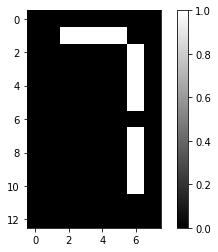

In [69]:
# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

### NMF learns the parts of images

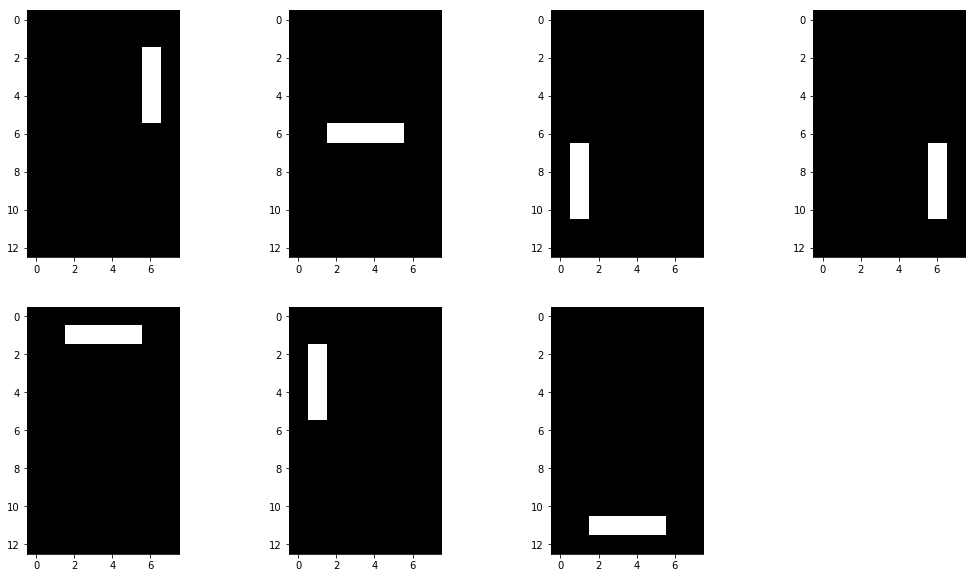

In [70]:
# Import NMF
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(digits)

# Call show_as_image on each component
plt.figure(figsize=(18,10))
x = 1
for component in model.components_:
    bitmap = component.reshape(13,8)
    plt.subplot(2,4,x)
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    x += 1

plt.show()

In [71]:
# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

[  4.76823559e-01   0.00000000e+00   0.00000000e+00   5.90605054e-01
   4.81559442e-01   0.00000000e+00   7.37557191e-16]


- If you put the 1, 4 and 5 images together you get a seven. Cool

### PCA doesn't learn parts
- Red means a negative value
- basically all the components have most of the parts 

In [72]:
def show_as_image(vector, x):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    """
    bitmap = vector.reshape((13, 8))  # make a square array
    bitmap /= np.abs(vector).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)

    plt.subplot(2,4,x)
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

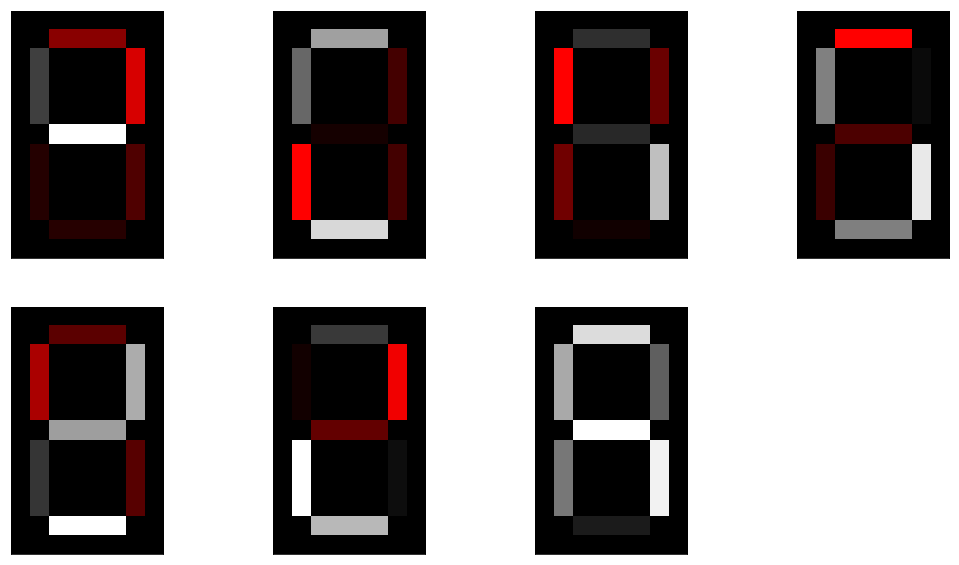

In [73]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(digits)

# Call show_as_image on each component
plt.figure(figsize=(18,10))
x = 1
for component in model.components_:
    show_as_image(component, x)
    x += 1
plt.show()

## Building recommender systems using NMF

#### Finding similar articles
- Engineer at a large online newspaper
- Task: recommend articles similar to article being read by customer
- Similar articles should have similar topics

#### Strategy
- Apply NMF to the word-frequency array
- NMF feature values describe the topics
- ... so similar documetns have similar NMF feature values
- Compare NMF feature values?

#### Versions of articles
- Different versions of the same document have same topic proportions
- ... exact feature values may be different
- e.g. because one version uses many meaningless words (weaker language)
- But all versions lie on the same line through the origin
![](images/cosine.png)

#### Cosine similarity
- Uses the angle between the lines
- Higher vaues mean more similar
- maximum value is 1, when angle is 0 deg

### Which articles are similar to 'Cristiano Ronaldo'?

In [74]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest(10))

Cristiano Ronaldo                    1.000000
Franck Ribéry                        0.999972
Radamel Falcao                       0.999942
Zlatan Ibrahimović                   0.999942
France national football team        0.999923
Colombia national football team      0.999897
Neymar                               0.999021
2014 FIFA World Cup qualification    0.998443
Arsenal F.C.                         0.997740
Football                             0.974922
dtype: float64


### Recommend musical artists part I

#### Load artist data and get it in the right shape for the exercise

In [75]:
file = 'data/scrobbler-small-sample.csv'
artists = pd.read_csv(file)
artists.head()

user_offset  artist_offset  playcount
0            1             79         58
1            1             84         80
2            1             86        317
3            1             89         64
4            1             96        159

In [76]:
artists.shape

(2894, 3)

- we want the user listens for each artist. 
- Topics will be users and scores will be listens I guess.
- So we need to pivot
- You could think of this as the sparse document matrix where articles are the rows and words are the columns

In [77]:
artists_spread = artists.pivot(
    index = 'artist_offset', 
    columns = 'user_offset', 
    values = 'playcount'
    ).fillna(0)
artists_spread.head()

user_offset      0      1      2    3    4    5    6    7    8    9   ...   \
artist_offset                                                         ...    
0                0.0    0.0  105.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
1              128.0  211.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
2                0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
3                0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
4                0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    

user_offset    490  491  492    493  494    495   496  497  498  499  
artist_offset                                                         
0              0.0  0.0  0.0    0.0  0.0    0.0   0.0  0.0  0.0  0.0  
1              0.0  0.0  0.0  270.0  0.0  105.0  97.0  0.0  0.0  0.0  
2              0.0  0.0  0.0    0.0  0.0    0.0   0.0  0.0  0.0  0.0  
3              0.0  0.0  0.0    0.0  0.0    0.0   0.0  0.0  0.0  0.0  
4              0.0  0.0  0.0    0.0  0.0    0.0   0.0  0.0  0.0  0.0  

[5 rows x 500 columns]

In [78]:
artists_spread.shape

(111, 500)

In [79]:
## load the corresponding artist names
file = 'data/artists.csv'
artists_names = pd.read_csv(file, header = None)[0].tolist()
artists_names[:6]

['Massive Attack',
 'Sublime',
 'Beastie Boys',
 'Neil Young',
 'Dead Kennedys',
 'Orbital']

#### Exercise

In [80]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components = 20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists_spread)


In [81]:
norm_features.shape

(111, 20)

### Recommend musical artists part II

In [82]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = artists_names)
df.head()

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest(10))


Bruce Springsteen    1.000000
Neil Young           0.959059
Leonard Cohen        0.917299
Van Morrison         0.882412
Bob Dylan            0.866093
Simon & Garfunkel    0.853084
Ryan Adams           0.849971
Tom Waits            0.823539
The Beach Boys       0.816126
Phish                0.763036
dtype: float64


## Final thoughts

- This class was simple and to the point
- I can't belive its that easy to make a recommendation system
 - I know there will be lost more details to consider in the real world but still
- Great class